# BlockPhish AI

This notebook can be executed with Google Colab.

This notebook contains :

* The data formatting
* Neural network training



If you want to compile the neural network please load the following files in the current session:
* phishing_url_save.p
* good_url_save.p

This is the list of all the required imports:




In [71]:
import numpy as np 
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from keras import utils, layers, models, optimizers

We load our data from the two following pickle files using pandas

In [72]:
phishing_data = pd.read_pickle("phishing_url_save.p")
good_data = pd.read_pickle("good_url_save.p")

This is the list of names of the different data parameters

In [73]:
columns=['having_IPhaving_IP_Address','URLURL_Length','Shortining_Service','having_At_Symbol','double_slash_redirecting','Prefix_Suffix','having_Sub_Domain','SSLfinal_State','Domain_registeration_length','Favicon','port','HTTPS_token','Request_URL','URL_of_Anchor','Links_in_tags']

Using Pandas we open two dataframes and add the corresponding result column

In [74]:
first_df = pd.DataFrame(phishing_data,columns=columns)
second_df = pd.DataFrame(good_data,columns=columns)

listP=[]
listS=[]
for i in range(first_df.shape[0]):
  listP.append(0)
for i in range(second_df.shape[0]):
  listS.append(1)

first_df = first_df.assign(Result=listP)
second_df = second_df.assign(Result=listS)



We group together the two dataframes and mix the rows

In [75]:
dataframe=first_df.append(second_df)
dataframe=dataframe.sample(axis=0,frac=1)

In [25]:
#dataframe Uncoment this line if you want to see what the dataframe looks like

We move the result column away to able the AI to train on and test the data. Then we normalize our data using min_max_scaler before splitting the data into two dataset for training and testing the neural network.

In [76]:
result = dataframe['Result']
del dataframe['Result']
data = dataframe[columns]
results = result.values
dataset = data.values
 
min_max_scaler = preprocessing.StandardScaler()
dataset_scale = min_max_scaler.fit_transform(dataset)

#Split train data(70%) and test data(30%)
train_dataset,test_dataset,train_resultats,test_resultats = model_selection.train_test_split(dataset_scale,results, train_size=0.7,test_size=0.3)

This is the neural network, with 4 Dense layers using StocahisticGradientDescent optimizer: SGD and BinaryCrossentropy Loss.

In [81]:
#Training Model
# Define the neural network

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(15,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
        train_dataset,#visages d'entrainement
        train_resultats,#noms d'entrainement
        batch_size = 15,#ajout batchsize
        epochs=20,#nombre d'iteration
        validation_data= (test_dataset,test_resultats)) #visages et noms de test

Epoch 1/20
818/818 [==============================] - 2s 2ms/step - loss: 0.6857 - accuracy: 0.6054 - val_loss: 0.6528 - val_accuracy: 0.6926
Epoch 2/20
818/818 [==============================] - 1s 2ms/step - loss: 0.6357 - accuracy: 0.7027 - val_loss: 0.5708 - val_accuracy: 0.7620
Epoch 3/20
818/818 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.7544 - val_loss: 0.5231 - val_accuracy: 0.7664
Epoch 4/20
818/818 [==============================] - 2s 2ms/step - loss: 0.5152 - accuracy: 0.7694 - val_loss: 0.5059 - val_accuracy: 0.7721
Epoch 5/20
818/818 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.7679 - val_loss: 0.4974 - val_accuracy: 0.7774
Epoch 6/20
818/818 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7733 - val_loss: 0.4933 - val_accuracy: 0.7769
Epoch 7/20
818/818 [==============================] - 1s 2ms/step - loss: 0.4837 - accuracy: 0.7763 - val_loss: 0.4901 - val_accuracy: 0.7788
Epoch 

The next cell will display the curves of training and testing accuracy and loss

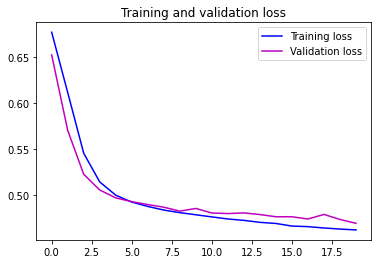

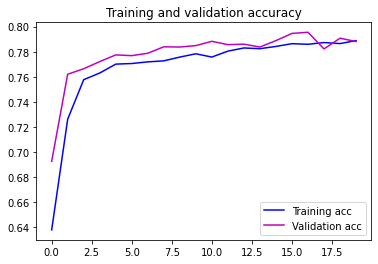

In [83]:
# Get the training info
loss     = history.history['loss']
val_loss = history.history['val_loss']
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

# Visualize the history plots
plt.figure()
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'm', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(acc, 'b', label='Training acc')
plt.plot(val_acc, 'm', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()